In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv("../datasets/supermarket_data/supermarket_orders.csv")
print(df.head())

   order_id product
0      1001  Butter
1      1001  Spices
2      1002    Rice
3      1002     Oil
4      1002  Spices


In [3]:
basket = df.groupby(['order_id', 'product'])['product'] \
            .count().unstack().reset_index().fillna(0).set_index('order_id')

# Convert counts to binary (1 = bought, 0 = not bought)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print(basket.shape)
basket.head()

(5000, 29)


C:\Users\madhu\AppData\Local\Temp\ipykernel_34732\3198572979.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


product,Apple,Banana,Biscuits,Bread,Butter,Cheese,Chips,Coffee,Dal,Detergent,...,Rice,Salt,Shampoo,Soap,Spices,Sugar,Tea,Tomato,Toothpaste,Yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
1001,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1003,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1004,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
frequent_items = apriori(basket, min_support=0.02, use_colnames=True)
print("\nTop Frequent Itemsets (Apriori):")
print(frequent_items.sort_values("support", ascending=False).head(10))


Top Frequent Itemsets (Apriori):
    support    itemsets
3    0.1808     (Bread)
24   0.1804     (Sugar)
14   0.1750      (Milk)
25   0.1416       (Tea)
26   0.1380    (Tomato)
2    0.1366  (Biscuits)
10   0.1366      (Eggs)
17   0.1356    (Orange)
18   0.1352    (Potato)
5    0.1346    (Cheese)


c:\Learning\Labs\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.3)
rules = rules.sort_values("confidence", ascending=False)

print("\nTop Rules from Apriori:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top Rules from Apriori:
              antecedents consequents  support  confidence      lift
55           (Sugar, Tea)  (Biscuits)   0.0550    0.889968  6.515136
49        (Orange, Apple)    (Banana)   0.0512    0.882759  6.687565
70          (Sugar, Milk)    (Coffee)   0.0500    0.877193  6.556001
72            (Rice, Oil)    (Spices)   0.0502    0.871528  6.798189
85  (Shampoo, Toothpaste)      (Soap)   0.0506    0.866438  6.446714
47       (Orange, Banana)     (Apple)   0.0512    0.859060  6.567740
86     (Soap, Toothpaste)   (Shampoo)   0.0506    0.857627  6.458036
53        (Biscuits, Tea)     (Sugar)   0.0550    0.856698  4.748879
63         (Eggs, Cheese)     (Bread)   0.0512    0.856187  4.735549
68        (Coffee, Sugar)      (Milk)   0.0500    0.853242  4.875670


In [18]:
frequent_items_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)
rules_fp = association_rules(frequent_items_fp, metric="confidence", min_threshold=0.3)
rules_fp = rules_fp.sort_values("confidence", ascending=False)

print("\nTop Rules from FP-Growth:")
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

c:\Learning\Labs\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top Rules from FP-Growth:
              antecedents consequents  support  confidence      lift
70           (Sugar, Tea)  (Biscuits)   0.0550    0.889968  6.515136
60        (Orange, Apple)    (Banana)   0.0512    0.882759  6.687565
43          (Sugar, Milk)    (Coffee)   0.0500    0.877193  6.556001
11            (Rice, Oil)    (Spices)   0.0502    0.871528  6.798189
81  (Shampoo, Toothpaste)      (Soap)   0.0506    0.866438  6.446714
58       (Orange, Banana)     (Apple)   0.0512    0.859060  6.567740
82     (Soap, Toothpaste)   (Shampoo)   0.0506    0.857627  6.458036
68        (Biscuits, Tea)     (Sugar)   0.0550    0.856698  4.748879
49         (Eggs, Cheese)     (Bread)   0.0512    0.856187  4.735549
41        (Coffee, Sugar)      (Milk)   0.0500    0.853242  4.875670


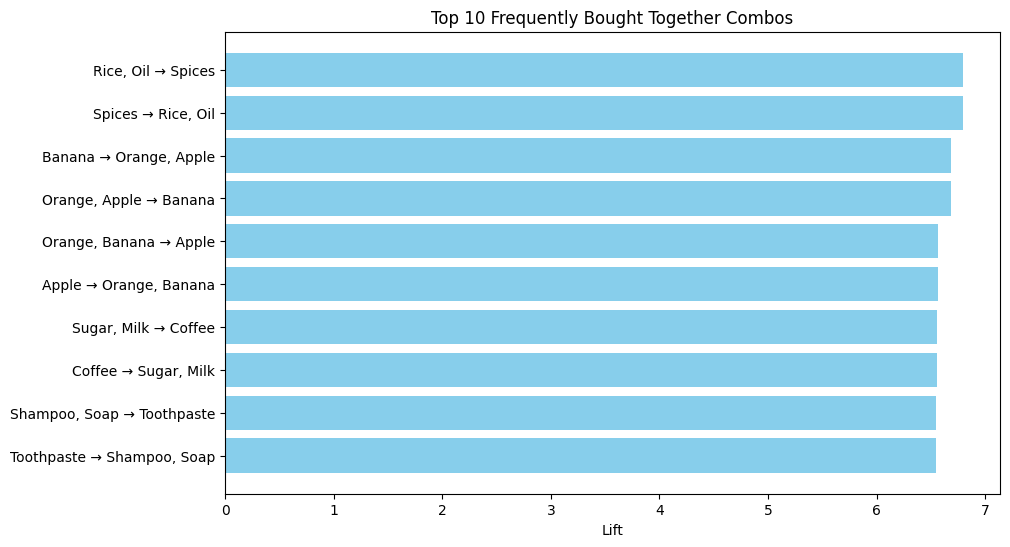

In [11]:
top_rules = rules_fp.sort_values("lift", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(range(len(top_rules)), top_rules['lift'], color="skyblue")
plt.yticks(
    range(len(top_rules)),
    [f"{', '.join(list(a))} → {', '.join(list(c))}"
     for a, c in zip(top_rules['antecedents'], top_rules['consequents'])]
)
plt.xlabel("Lift")
plt.title("Top 10 Frequently Bought Together Combos")
plt.gca().invert_yaxis()
plt.show()

In [12]:
def recommend_products(cart_items, rules_df, top_n=3):
    """Recommend products based on items in the cart."""
    recommendations = set()
    for item in cart_items:
        # Find rules where current item is in antecedents
        matched_rules = rules_df[rules_df['antecedents'].apply(lambda x: item in x)]
        for _, row in matched_rules.iterrows():
            for product in row['consequents']:
                if product not in cart_items:
                    recommendations.add(product)
        if len(recommendations) >= top_n:
            break
    return list(recommendations)[:top_n]

# Example Usage
cart = ["Milk", "Bread"]
suggestions = recommend_products(cart, rules_fp, top_n=3)
print(f"\nCart: {cart}")
print(f"Recommended Products: {suggestions}")


Cart: ['Milk', 'Bread']
Recommended Products: ['Coffee', 'Sugar', 'Butter']


In [16]:
# You can manually check support of a product:

milk_support = basket['Milk'].sum() / basket.shape[0]
print("Support for Milk:", milk_support)

bread_support = basket['Bread'].sum() / basket.shape[0]
print("Support for Bread:", bread_support)
basket['Milk'].sum() 
basket.shape[0]

Support for Milk: 0.175
Support for Bread: 0.1808


5000